<h1>Import Libraries</h1>


In [210]:
import numpy as np
import pandas as pd
pd.options.display.max_columns = 100
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [211]:
# Import csv file and store them as pandas objects
test = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")

In [212]:
# To display all results in one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [213]:
print('The train set has the shape {}'.format(train.shape))
train.head(5)
train.columns

The train set has the shape (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<h1>Visualizing Data</h1>

Roughly categorize data and visualize relationship between different factors and survival rate by following two methods:

1. Groupby
2. Barplot (Seaborn)

In [214]:
train.count() #Is there any NaN cell among 891 entries?

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

Comment:
1. 2 people not known where they got aboard
2. 187 people no age figures

<h2>Sex</h2>

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,431.028662,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
male,454.147314,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


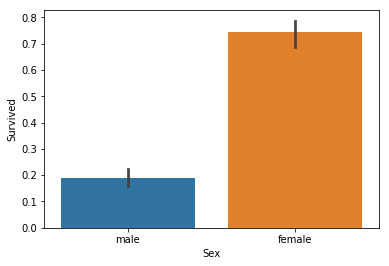

In [215]:
train.groupby(['Sex']).mean()
sns.barplot(x=train['Sex'], y=train['Survived'])

In [216]:
train[['Fare','Age']].corr()

,Fare,Age
Fare,1.000000,0.096067
Age,0.096067,1.000000


In [217]:
train[['Sex','Survived']].corr() #It doesn't work for categorized data. Please convert Sex column into Boolean

,Survived
Survived,1.0


In [230]:
train['SexBool'] = (train['Sex'] == 'male')*1 #Assign male as 1, female as 0

In [228]:
train['SexBool']

0      1
1      0
2      0
3      0
4      1
5      1
6      1
7      1
8      0
9      0
10     0
11     0
12     1
13     1
14     0
15     0
16     1
17     1
18     0
19     0
20     1
21     1
22     0
23     1
24     0
25     0
26     1
27     1
28     0
29     1
      ..
861    1
862    0
863    0
864    1
865    0
866    0
867    1
868    1
869    1
870    1
871    0
872    1
873    1
874    0
875    0
876    1
877    1
878    1
879    0
880    0
881    1
882    0
883    1
884    1
885    0
886    1
887    0
888    0
889    1
890    1
Name: SexBool, Length: 891, dtype: int64

In [229]:
train[['SexBool','Survived']].corr()

,SexBool,Survived
SexBool,1.000000,-0.543351
Survived,-0.543351,1.000000


Comment: corr=-0.543351 indicates mild correlation between survival and sexbool. Male were quite prone to death.

<h2>Ticket Class (Pclass)</h2>

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


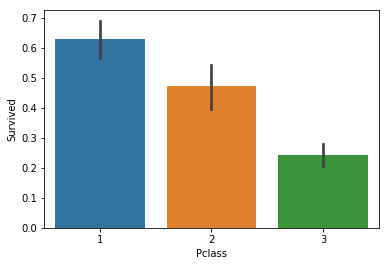

In [92]:
train.groupby(['Pclass']).mean()
sns.barplot(x=train['Pclass'], y=train['Survived'])

One may also group by ticke class and sex as follows:

PassengerId  Survived        Age     SibSp     Parch  \
Pclass Sex                                                            
1      female   469.212766  0.968085  34.611765  0.553191  0.457447   
       male     455.729508  0.368852  41.281386  0.311475  0.278689   
2      female   443.105263  0.921053  28.722973  0.486842  0.605263   
       male     447.962963  0.157407  30.740707  0.342593  0.222222   
3      female   399.729167  0.500000  21.750000  0.895833  0.798611   
       male     455.515850  0.135447  26.507589  0.498559  0.224784   

                     Fare  
Pclass Sex                 
1      female  106.125798  
       male     67.226127  
2      female   21.970121  
       male     19.741782  
3      female   16.118810  
       male     12.661633

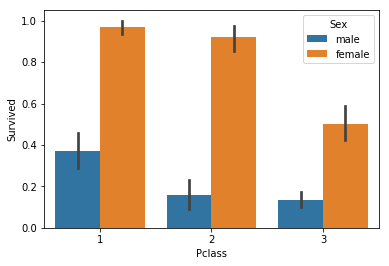

In [176]:
train.groupby(['Pclass','Sex']).mean()
sns.barplot(x=train['Pclass'], y=train['Survived'], hue=train['Sex'])

<h2>Number of Siblings/Spouses Aboard (SibSp)</h2>

,PassengerId,Survived,Pclass,Age,Parch,Fare
SibSp,,,,,,
0,455.370066,0.345395,2.351974,31.397558,0.185855,25.692028
1,439.727273,0.535885,2.057416,30.089727,0.655502,44.147370
2,412.428571,0.464286,2.357143,22.620000,0.642857,51.753718
3,321.562500,0.250000,2.562500,13.916667,1.312500,68.908862
4,381.611111,0.166667,3.000000,7.055556,1.500000,31.855556
5,336.800000,0.000000,3.000000,10.200000,2.000000,46.900000
8,481.714286,0.000000,3.000000,NaN,2.000000,69.550000


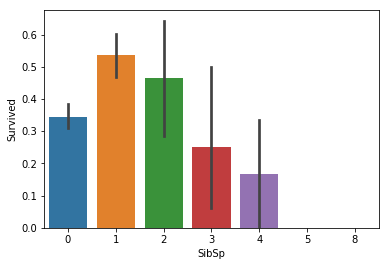

In [97]:
train.groupby(['SibSp']).mean()
sns.barplot(x=train['SibSp'], y=train['Survived'])

<h2>Number of Parents/Children Aboard (Parch)</h2>

,PassengerId,Survived,Pclass,Age,SibSp,Fare
Parch,,,,,,
0,445.255162,0.343658,2.321534,32.178503,0.237463,25.586774
1,465.110169,0.550847,2.203390,24.422000,1.084746,46.778180
2,416.662500,0.500000,2.275000,17.216912,2.062500,64.337604
3,579.200000,0.600000,2.600000,33.200000,1.000000,25.951660
4,384.000000,0.000000,2.500000,44.500000,0.750000,84.968750
5,435.200000,0.200000,3.000000,39.200000,0.600000,32.550000
6,679.000000,0.000000,3.000000,43.000000,1.000000,46.900000


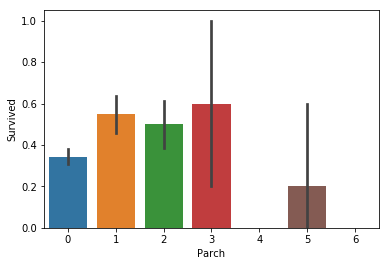

In [151]:
train.groupby(['Parch']).mean()
sns.barplot(x=train['Parch'], y=train['Survived'])

<h2>Fare</h2>

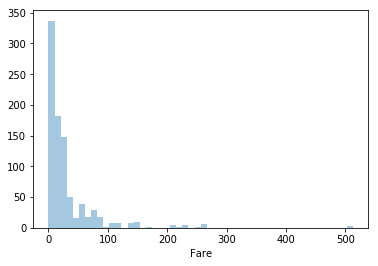

In [177]:
train.groupby(['Fare']).mean();
sns.distplot(train['Fare'],kde=False);

In [121]:
Q1 = train['Fare'].quantile(0.25)
Q3 = train['Fare'].quantile(0.75)
IQR = Q3 - Q1
print(IQR, Q1, Q3)

23.0896 7.9104 31.0


"The Freedman-Diaconis rule..."

https://stats.stackexchange.com/questions/798/calculating-optimal-number-of-bins-in-a-histogram

In [160]:
h = 2*IQR/(train['PassengerId'].count()**(1/3)) #bin width
h #bin width
w1 = (train['Fare'].max() - train['Fare'].min())/h
w1 #number of bins :( 
w2 = (train['Fare'].max() - train['Fare'].min())/20
w2

4.799034112500582

106.75673229024956

25.61646

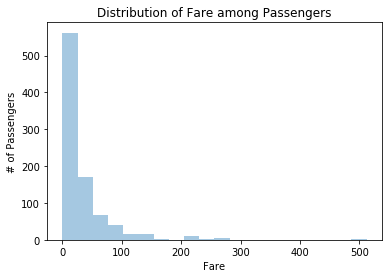

In [186]:
train.groupby(['Fare']).mean();
fare_dist = sns.distplot(train['Fare'],bins=20,kde=False);
fare_dist.set_title('Distribution of Fare among Passengers');
fare_dist.set_ylabel('# of Passengers');
#Still haven't got a mind to make Fare histogram look better. May treat dimensionality reduction with Pclass

Other factors that may relate to survival rate:

* Title of passenger
* Cabin number they belong
* Age